In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

In [2]:
X = np.empty((500,2))
parent_folder_path = '/Users/nimitt/Documents/SRIP/SemiconductorFabricationGAA/Data_GAA/CSV_files'
folders = glob.glob(os.path.join(parent_folder_path, '*'))
for i in range(len(folders)):
    files = glob.glob(os.path.join(folders[i], '*'))
    files.sort()

    for j in range(len(files)):
        path = files[j]
        path_break = path.split('/')
        features = np.array(list(map(float,path_break[-1][7:-4].split('_'))))
        X[5*i+j] = features

In [59]:
Y = np.empty((500,20,40))
parent_folder_path = '/Users/nimitt/Documents/SRIP/SemiconductorFabricationGAA/Data_GAA/CSV_files'
folders = glob.glob(os.path.join(parent_folder_path, '*'))
for i in range(len(folders)):
    files = glob.glob(os.path.join(folders[i], '*'))
    files.sort()

    for j in range(len(files)):
        path = files[j]
        data = pd.read_csv(path)
        for k in range(20):
            Y[5*i+j][k] = data[' Metrology_Out'][40*k:40*(k+1)] - 0.008

In [60]:
Y = Y[:, 2:-2:4, np.r_[0:10, 15:25, 30:40]]
Y = Y[:,:,::5]

In [61]:
Y = Y.reshape(500,-1)

In [62]:
Y.shape

(500, 24)

In [63]:
C = np.empty((500,3,20,40))
parent_folder_path = '/Users/nimitt/Documents/SRIP/SemiconductorFabricationGAA/Data_GAA/CSV_files'
folders = glob.glob(os.path.join(parent_folder_path, '*'))
for i in range(len(folders)):
    files = glob.glob(os.path.join(folders[i], '*'))
    files.sort()

    for j in range(len(files)):
        path = files[j]
        data = pd.read_csv(path)
        for k in range(20):
            C[5*i+j][0][k] = data['x1'][40*k:40*(k+1)]
            C[5*i+j][1][k] = data[' y1'][40*k:40*(k+1)]
            C[5*i+j][2][k] = data[' z1'][40*k:40*(k+1)]

In [64]:
C = C[:,:, 2:-2:4, np.r_[0:10, 15:25, 30:40]]
C = C[:,:,:,::5]

In [65]:
C = C.reshape(500,3,-1)

In [66]:
C.shape

(500, 3, 24)

# Visualisation

ClFlux =  0.00232


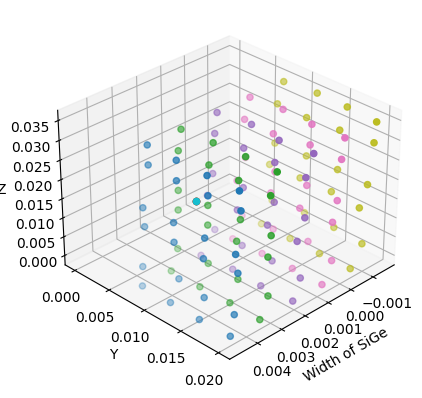

ClFlux =  0.00268


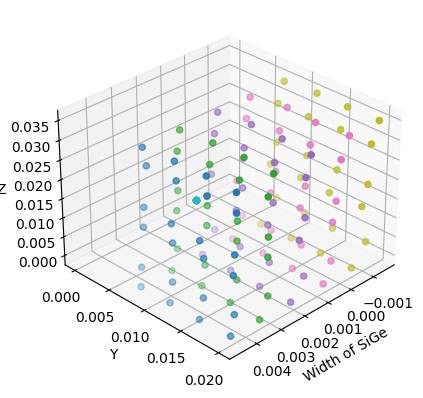

ClFlux =  0.00065


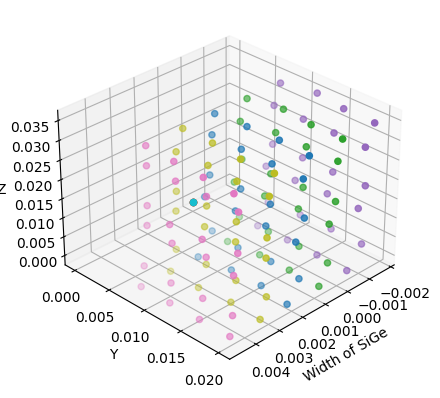

ClFlux =  0.00096


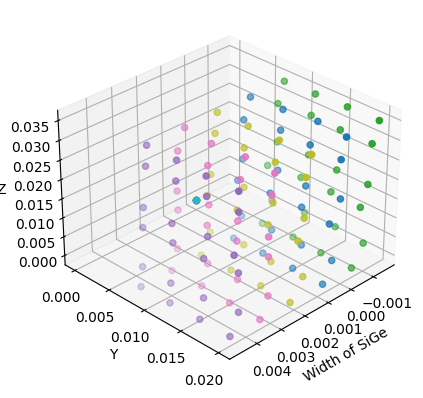

ClFlux =  0.00054


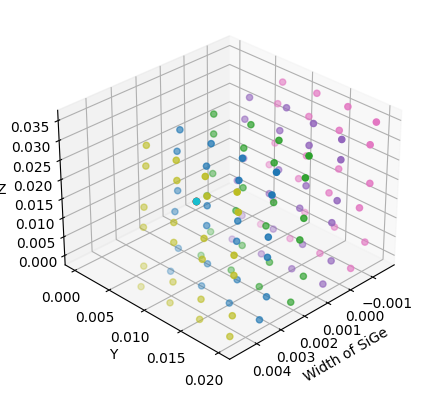

ClFlux =  0.00261


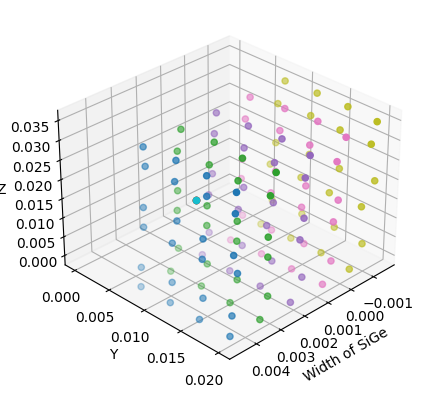

ClFlux =  0.00205


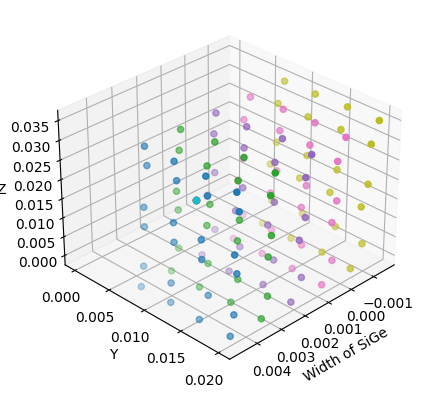

ClFlux =  0.00258


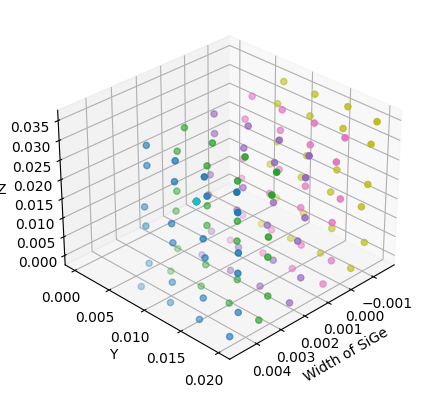

ClFlux =  0.00267


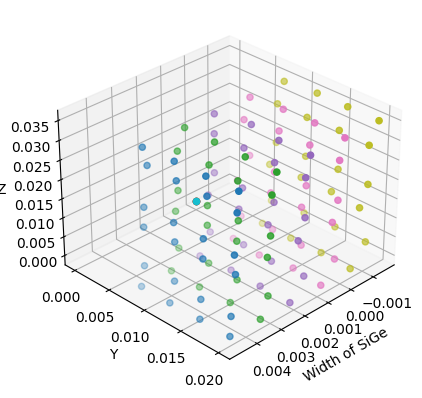

ClFlux =  0.00293


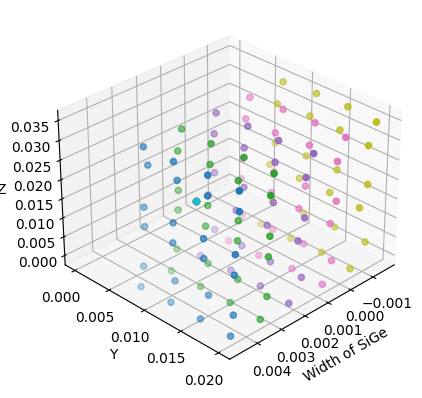

In [67]:
for j in range(10):
    fig = plt.figure()
    ax = plt.axes(projection ='3d')
    print('ClFlux = ',X[5*j][0])
    for i in range(5):
        y = C[5*j+i][1]
        z = C[5*j+i][2]
        x = Y[5*j+i]
        ax.scatter3D(x, y, z, 'green')
        ax.scatter3D([0], [0], [0], 'green')
        ax.set_xlabel('Width of SiGe')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.view_init(elev=30, azim=45)  # Adjust these values as needed
    plt.show()